In [45]:
from PIL import Image
import requests
import torch

from transformers import AutoProcessor, CLIPVisionModelWithProjection

model = CLIPVisionModelWithProjection.from_pretrained("openai/clip-vit-base-patch32")
processor = AutoProcessor.from_pretrained("openai/clip-vit-base-patch32")




Some weights of the model checkpoint at openai/clip-vit-base-patch32 were not used when initializing CLIPVisionModelWithProjection: ['text_model.encoder.layers.4.mlp.fc2.bias', 'text_model.encoder.layers.1.layer_norm2.bias', 'text_model.encoder.layers.9.self_attn.q_proj.bias', 'text_model.encoder.layers.1.self_attn.q_proj.weight', 'text_model.encoder.layers.10.layer_norm2.bias', 'text_model.encoder.layers.6.layer_norm1.weight', 'text_model.encoder.layers.9.self_attn.q_proj.weight', 'text_model.encoder.layers.10.self_attn.out_proj.bias', 'text_model.encoder.layers.3.self_attn.q_proj.bias', 'text_model.encoder.layers.11.self_attn.q_proj.bias', 'text_model.encoder.layers.6.mlp.fc1.bias', 'text_model.encoder.layers.6.self_attn.q_proj.bias', 'text_model.encoder.layers.9.layer_norm1.bias', 'text_model.encoder.layers.3.mlp.fc1.bias', 'text_model.encoder.layers.0.mlp.fc2.bias', 'text_model.encoder.layers.10.self_attn.v_proj.weight', 'text_model.encoder.layers.9.mlp.fc2.bias', 'text_model.encod

In [58]:
import os
url = "http://images.cocodataset.org/val2017/000000039769.jpg"
url = "https://media.istockphoto.com/id/843823656/photo/hotel-room.webp?s=2048x2048&w=is&k=20&c=SQU3HBg5qBtNX4PGRhtMzqWM74Ej5BdqA1tyVs7Fx70="
image = Image.open(os.path.join("../../Hotels-50K/images/train/2586951.jpg"))
image2 = Image.open(os.path.join("../../Hotels-50K/images/train/3663.jpg"))


In [59]:
inputs = processor(images=[image, image2], return_tensors="pt")

outputs = model(**inputs)
# logits_per_image = outputs.logits_per_image  # this is the image-text similarity score
# probs = logits_per_image.softmax(dim=1)  # we can take the softmax to get the label probabilities
image_embed = outputs.image_embeds

In [48]:
image_embed.shape

torch.Size([2, 512])

In [60]:
cos = torch.nn.CosineSimilarity(dim=0)
output = cos(image_embed[0], image_embed[1])
output
# image_embed[1]

tensor(0.8957, grad_fn=<SumBackward1>)

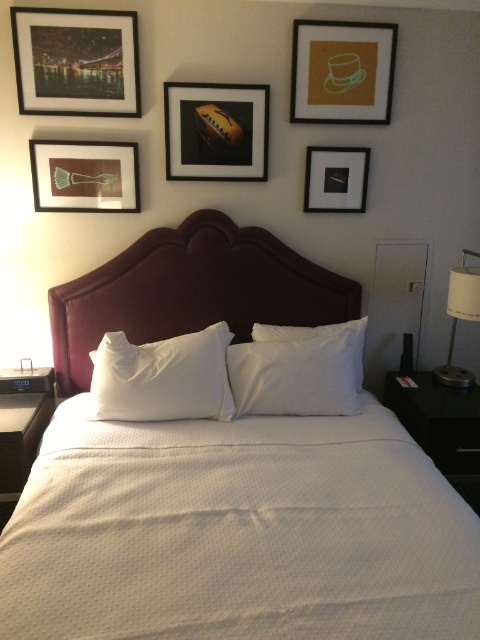

In [61]:
image

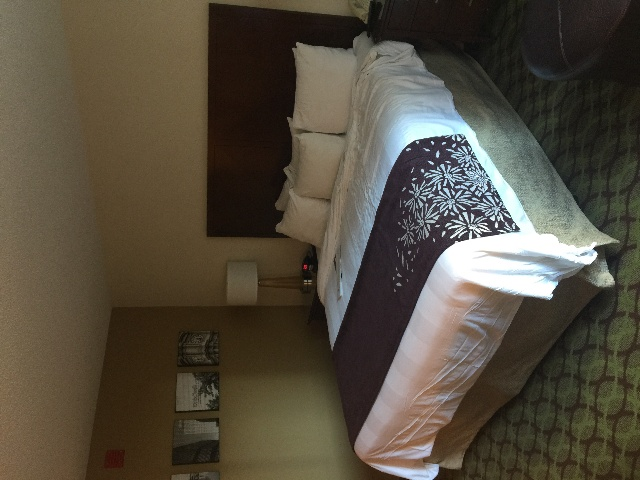

In [57]:
image2